## Part 1: Kernelized Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -----------------------------
# 1. Generate Nonlinear Training Data using a 5th order polynomial with sharp curvature
#    Here, we use: y = 10*x^5 - 100*x^3 + 40*x, which has two minima and two maxima with sharp transitions.
# -----------------------------
np.random.seed(42)

# Generate 250 evenly spaced points between -3 and 3 for a smooth curve and shuffle them
X_all = np.linspace(-3, 3, 250).reshape(-1, 1)
np.random.shuffle(X_all)

# Split into 200 training points and 50 validation points
X_train = X_all[:200]
y_train = 10 * X_train**5 - 100 * X_train**3 + 40 * X_train + np.random.randn(200, 1) * 300

X_val = X_all[200:]
y_val = 10 * X_val**5 - 100 * X_val**3 + 40 * X_val + np.random.randn(50, 1) * 300

# -----------------------------
# 2. TO DO: Linear Regression with Manually Created Polynomial Features (degree 5)
# -----------------------------

# -----------------------------
# 3. TO DO: Plot the Data and the Fit, and Print the Training and Validation Errors (MSE)
# -----------------------------

## Part 2: Logistic Regression and SoftMax Regression on MNIST 

In [ ]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml("mnist_784",version=1,return_X_y=True,as_frame=False)

#make the data into usable form, normalization
y_mnist = y_mnist.astype('int')
X_mnist = X_mnist/255.0

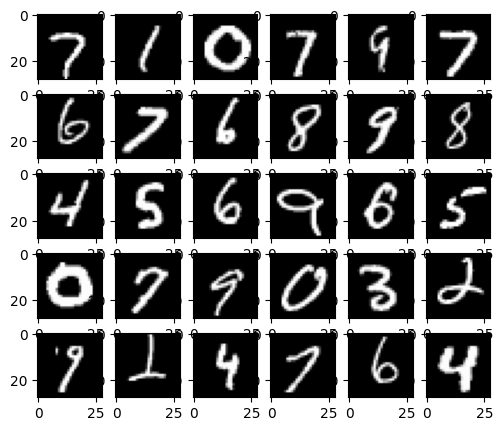

In [ ]:
def display_grid(list_conn, num_col):
    num_row = int(list_conn.shape[0]/num_col)

    fig, axes = plt.subplots(num_row, num_col, figsize=(num_col,num_row))
    for i in range(num_col*num_row):
        #ax.set_title("Conn. matrix (log scale), S = "+str(i+1), fontsize=12)
        ax = axes[i%num_row, int(i/num_row)]
        full_im = ax.imshow(list_conn[i].reshape((28,28)), cmap='gray')

    #make room for the colourbar on the right and plot it
    fig.subplots_adjust(right=0.88)
    plt.show()

display_grid(X_mnist[np.random.choice(np.arange(X_mnist.shape[0]), 30)], 6)

In [ ]:
def plot_curve1(pts, x_label, y_label, title):
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  index = np.arange(1, len(pts)+1, 1)
  plt.plot(index, pts, '-b')

  plt.show()

def calculate_accuracy(y_act, y_pred):
    """Calculate accuracy given actual and predicted labels."""
    y_act = np.asarray(y_act).flatten()
    y_pred = np.asarray(y_pred).flatten()
    return np.sum(y_act == y_pred) / len(y_act)

In [ ]:
def stratified_train_test_logistic(X, y, nclasses=10):
    np.random.seed(24)   #so that the same split is obtained always
    list_train = []
    list_cv = []
    list_test = []
    for label in np.unique(y):
        indices = np.where(y==label)[0]
        np.random.shuffle(indices)
        list_train += list(indices[0:int(len(indices)*6/7)])
        list_test += list(indices[int(len(indices)*6/7) : ])

    X_train_logistic = X[list_train]
    y_train_logistic = y[list_train]

    X_test_logistic = X[list_test]
    y_test_logistic = y[list_test]

    return X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic

X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic = stratified_train_test_logistic(X_mnist, y_mnist, nclasses=10)

In [ ]:
print(X_train_logistic.shape, y_train_logistic.shape, X_test_logistic.shape, y_test_logistic.shape)

(59996, 784) (59996,) (10004, 784) (10004,)


In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

# With gradient descent
def loss_softmax(X, W, Y):
    # TO DO: Get the predicted Y_hat for the current W. dim: R^(n×k)
    Y_hat = None

    # TO DO: cross-entropy loss L
    L = None
    return L

def gradient_softmax(X, W, Y):
    # TO DO: Vectorized implementation of softmax gradient
    # dim: R^(d×k)
    grad = None
    return grad

def learn_params_softmax(X, Y, lr, num_epochs):
    """
    Learn softmax regression parameters using gradient descent.

    X: Feature matrix (n×d)
    Y: One-hot encoded labels (n×k)
    lr: Learning rate
    num_epochs: Number of epochs

    Returns:
    W: Learned weight matrix
    loss: List of loss values over epochs
    """
    # TO DO: Initialize weights
    W = None

    loss = []
    for _ in range(num_epochs):
        # TO DO: Calculate loss and append to loss list
        # TO DO: Gradient update
        pass
    
    return W, loss

In [ ]:
def train_test_softmax(X_train, y_train):
    # TO DO: Convert to one-hot encoding
    # TO DO: Create a zero matrix of shape (n_samples, n_classes)
    Y = None
    # TO DO: Assign 1 to the correct class indices
    # TO DO: add 1s to X_train to allow bias in regression

    epochs = 10
    w, loss = learn_params_softmax(X_train, Y, 0.1, epochs)

    plot_curve1(loss, "epochs", "cost", "Learning Curve logistic regression")
    return w

w = train_test_softmax(X_train_logistic, y_train_logistic)

In [ ]:

def display_confusion_matrix(y, y_pred, n, title_="10x10 confusion matrix for MNIST classification", labels_ = np.arange(10)):
    confusion_matrix = np.zeros((n, n))
    n_sample_per_class = np.zeros((n, 1))
    for i in range(n):
        n_sample_per_class[i, 0] = np.sum(y == i)
    for i in range(len(y)):#range(y.shape[0]):
        confusion_matrix[y[i], y_pred[i]] += 1

    print (confusion_matrix)

    confusion_matrix = confusion_matrix / n_sample_per_class

    fig, ax = plt.subplots(figsize=(6, 8))
    heatmap = ax.imshow(confusion_matrix, cmap="YlGn")

    ax.set_xticks(np.arange(n), labels=labels_)
    ax.set_yticks(np.arange(n), labels=labels_)
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title(title_)
    for i in range(n):
        for j in range(n):
            if i == j:
                col = 'w'
            else:
                col = 'k'
            text = ax.text(j, i, np.round(confusion_matrix[i, j], 2), ha="center", va="center", color=col)
    return confusion_matrix

def display_test_results(W, X, y):
    # TO DO: Add 1s to X to allow bias in regression
    # TO DO: Convert to one-hot encoding
    # TO DO: Create a zero matrix of shape (n_samples, n_classes)
    Y = None
    # TO DO: Assign 1 to the correct class indices

    # TO DO: Get the probabilities for each class of the test set (X)
    # TO DO: Decide the predicted class label
    pred_y = None

    print ()
    print("Accuracy on test set by Logistic (multiclass) regression ", np.round(calculate_accuracy(y.T, pred_y), 2))

    #display the contingency table
    display_confusion_matrix(y.T, pred_y, len(np.unique(y)))



display_test_results(w, X_test_logistic, y_test_logistic)